# Visualization
In the previous notebook (data_cleaning_and_EDA) we created new csv file named `clean_csv.csv`
that contains clean df.

In this section ...

In [1]:
import pandas as pd

# Wordcloud visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Handle warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./clean_csv.csv")
df.drop(columns="Unnamed: 0", axis=1, inplace=True)
df

,category,merged_text
0,politics,mary trump slam susan sarandon moron suggest p...
1,politics,moment two ukrainian fighter jet bomb russian ...
2,politics,mark esper whats stake donald trump elect pres...
3,politics,hunter biden enlists hollywood mega lawyer cou...
4,politics,president trump response mark espers minute in...
...,...,...
9063,food,classic tater tot casserole green bean favorit...
9064,food,stew south india know different stew present s...
9065,food,biscuit self rise flour biscuit learning exper...
9066,food,streusel top banana bread example banana bread...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9068 entries, 0 to 9067
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     9068 non-null   object
 1   merged_text  9068 non-null   object
dtypes: object(2)
memory usage: 141.8+ KB


### Pie Chart

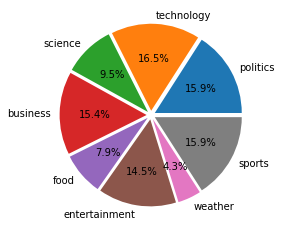

In [4]:


count_of_categories_articles = df['category'].value_counts(sort=False).to_list()
categories = df['category'].unique()

    
plt.pie(count_of_categories_articles, 
        labels = categories,
        autopct = "%1.1f%%",
        explode = [0.05 for _ in categories])

plt.show()

### Tokenization 

In [5]:
from nltk import word_tokenize

df['merged_text'] = df['merged_text'].apply(word_tokenize)
df

,category,merged_text
0,politics,"[mary, trump, slam, susan, sarandon, moron, su..."
1,politics,"[moment, two, ukrainian, fighter, jet, bomb, r..."
2,politics,"[mark, esper, whats, stake, donald, trump, ele..."
3,politics,"[hunter, biden, enlists, hollywood, mega, lawy..."
4,politics,"[president, trump, response, mark, espers, min..."
...,...,...
9063,food,"[classic, tater, tot, casserole, green, bean, ..."
9064,food,"[stew, south, india, know, different, stew, pr..."
9065,food,"[biscuit, self, rise, flour, biscuit, learning..."
9066,food,"[streusel, top, banana, bread, example, banana..."


### Bar Plot

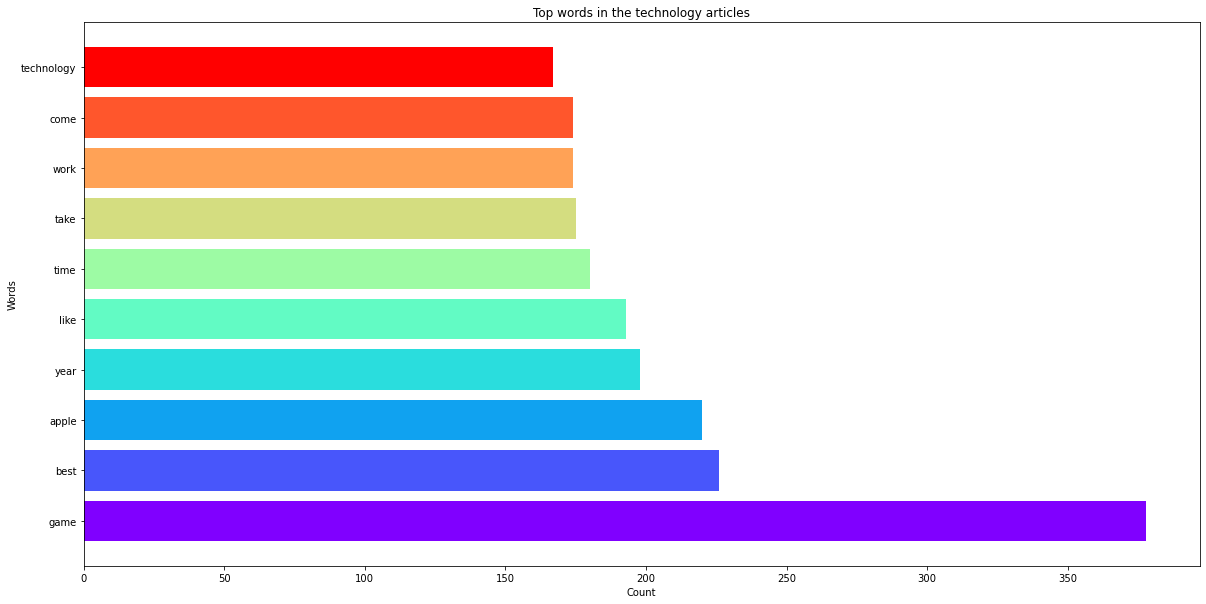

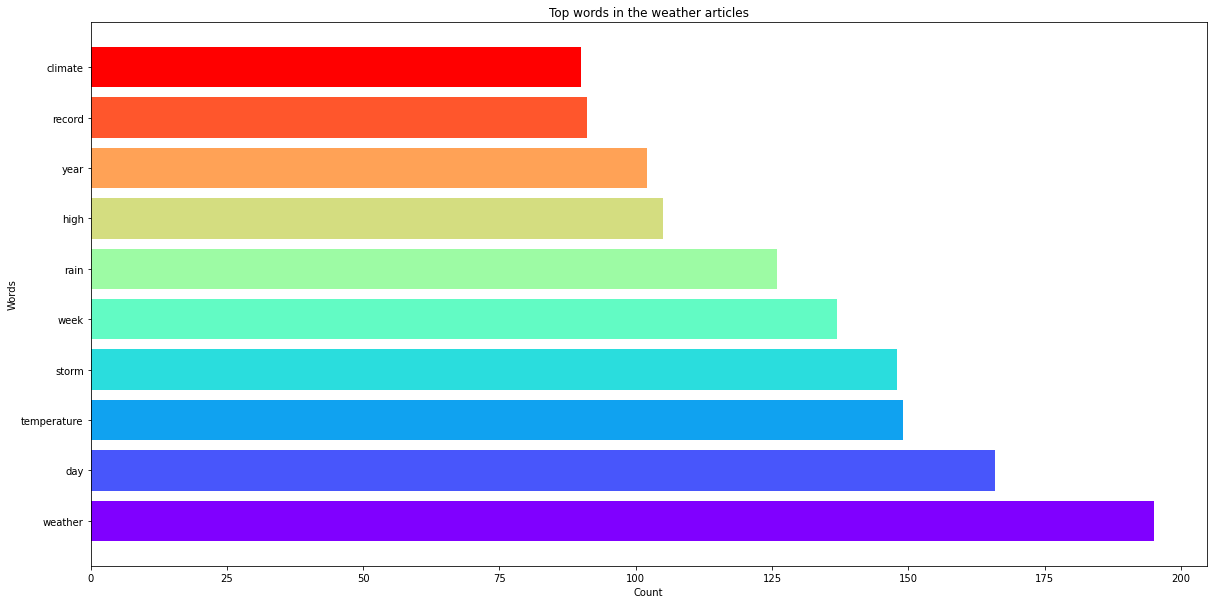

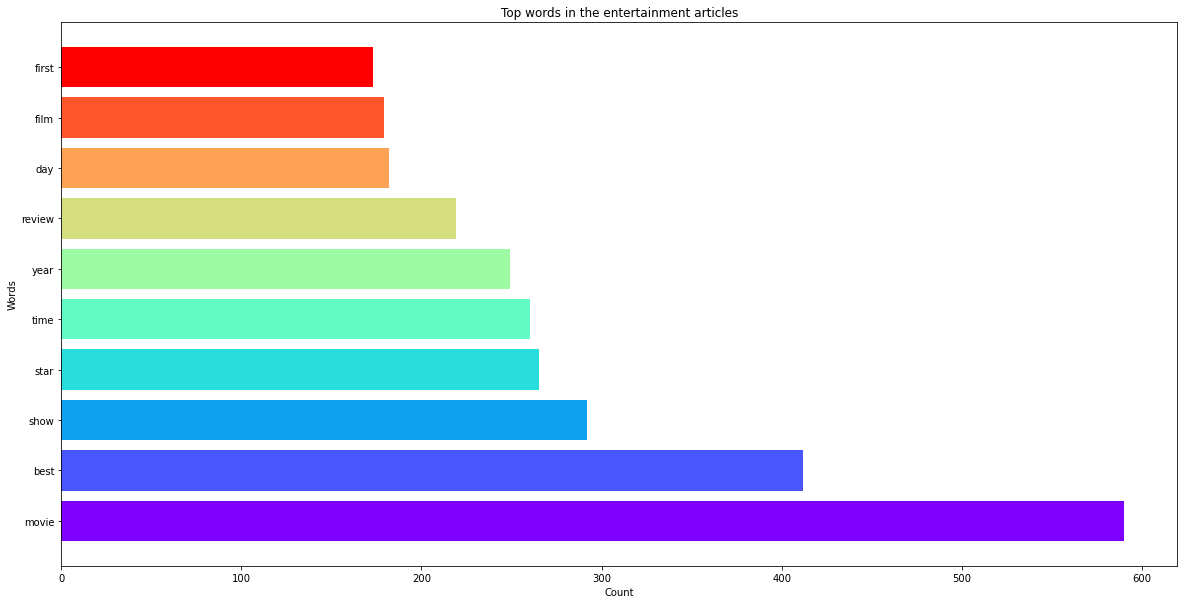

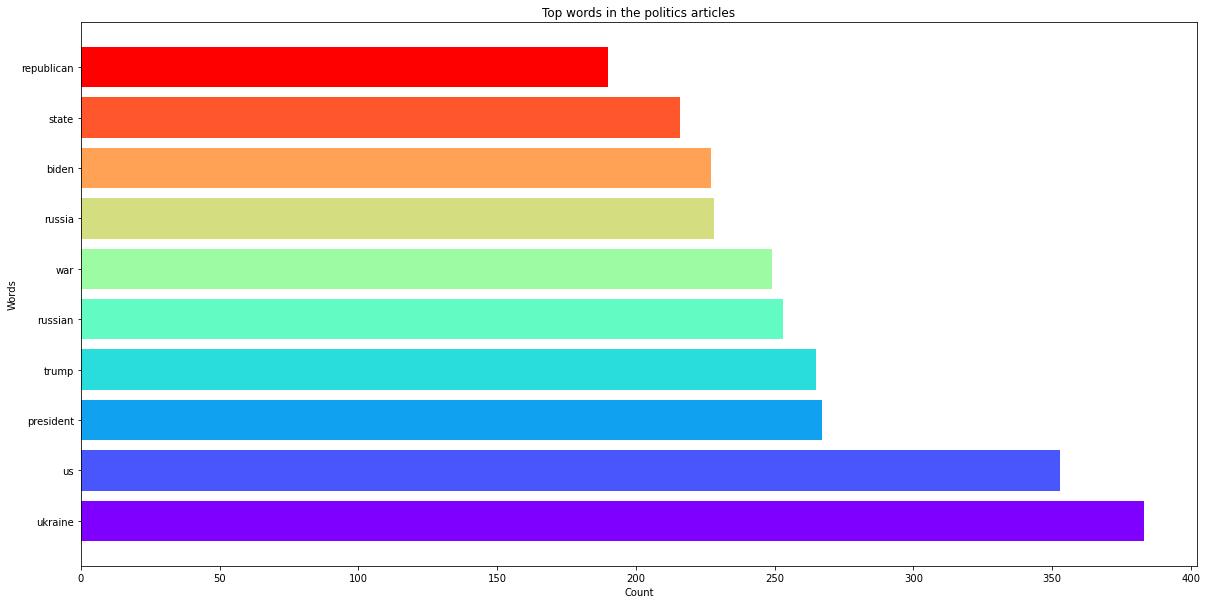

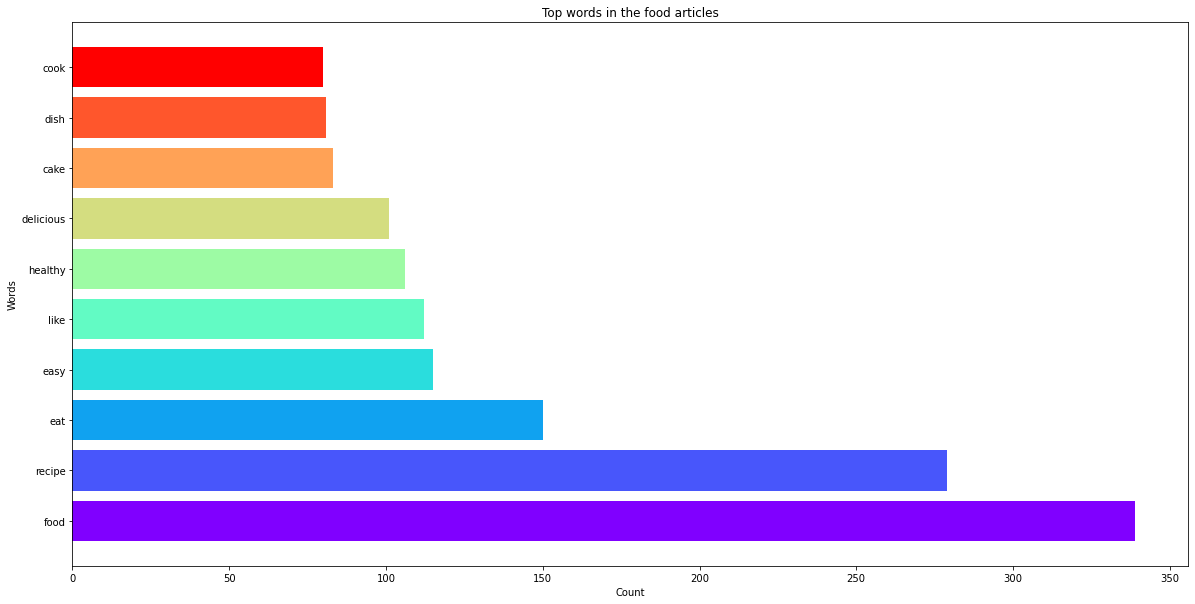

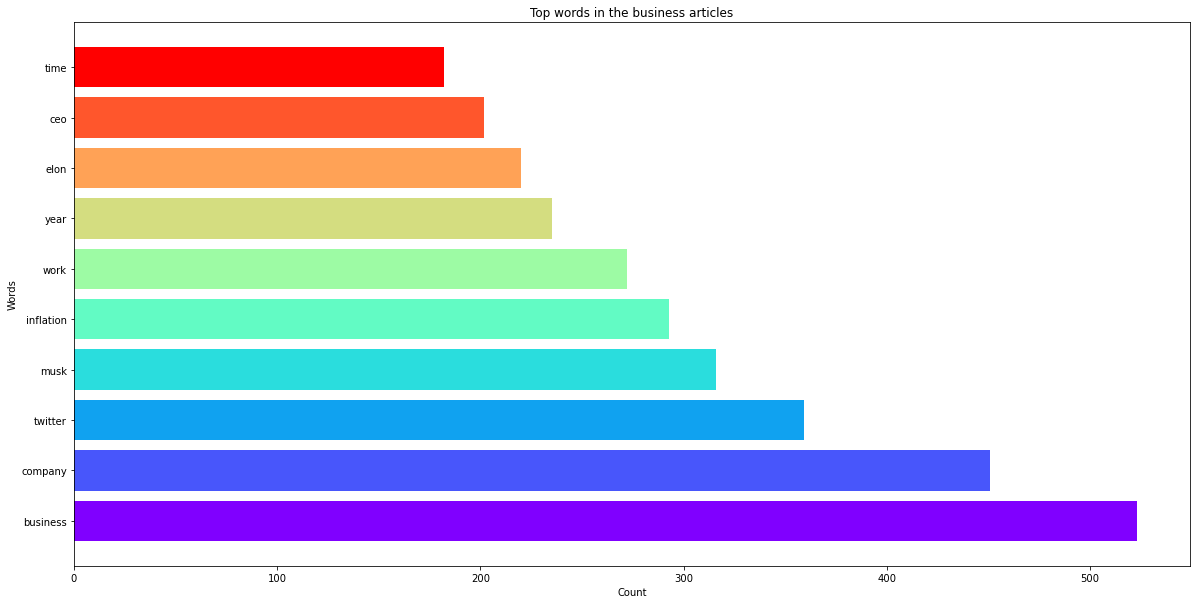

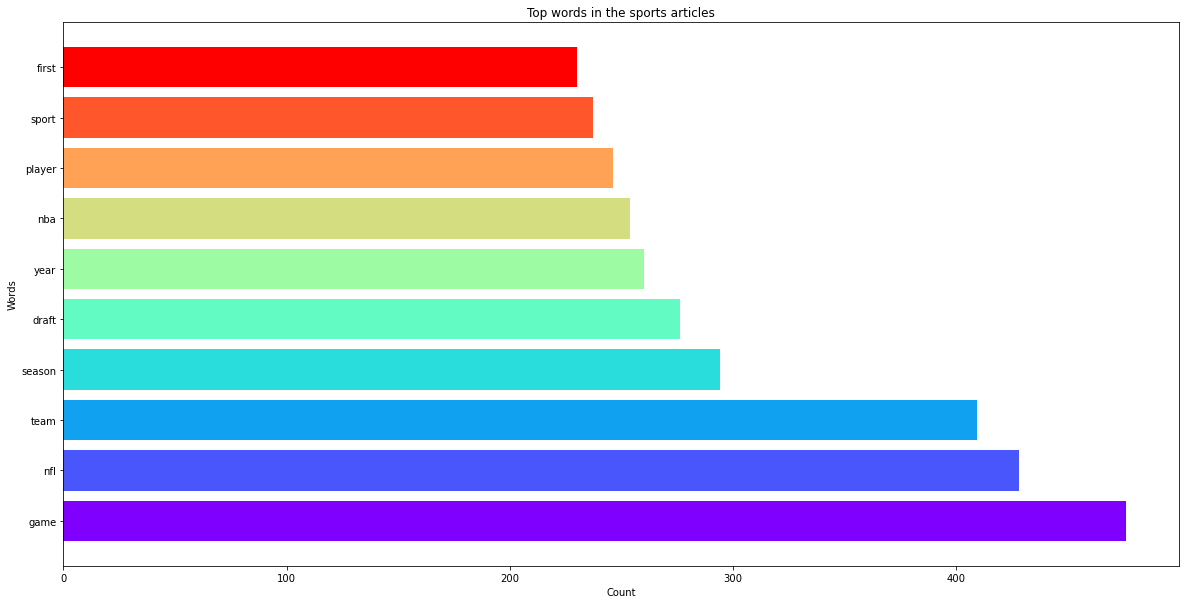

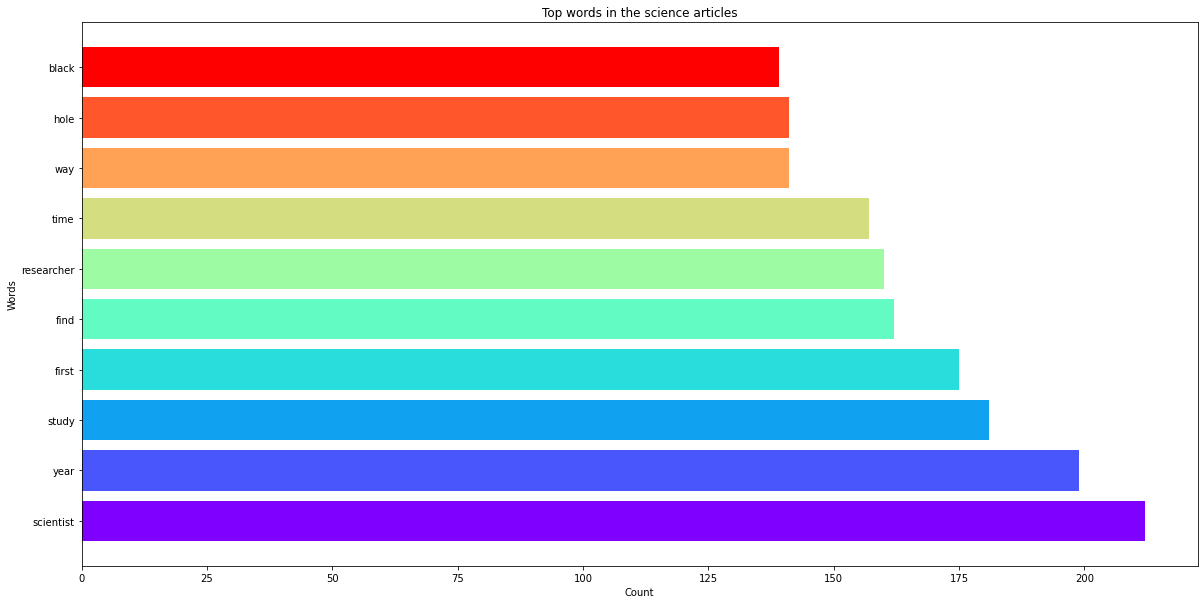

In [6]:
import itertools
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS

for category in set(df["category"]):
    category_words = df[df["category"] == category]["merged_text"]
    
    filtered_words = list(itertools.chain.from_iterable(category_words))        
    counted_words = collections.Counter(filtered_words)

    words = []
    counts = []
    for letter, count in counted_words.most_common(10):
        words.append(letter)
        counts.append(count)
        
    colors = cm.rainbow(np.linspace(0, 1, 10))
    rcParams['figure.figsize'] = 20, 10
    
    plt.title(f'Top words in the {category} articles')
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.barh(words, counts, color=colors)
    plt.show()
        
    

### Distribution of Words

In [7]:
df["words_count"] = df["merged_text"].apply(len)
df

,category,merged_text,words_count
0,politics,"[mary, trump, slam, susan, sarandon, moron, su...",24
1,politics,"[moment, two, ukrainian, fighter, jet, bomb, r...",97
2,politics,"[mark, esper, whats, stake, donald, trump, ele...",38
3,politics,"[hunter, biden, enlists, hollywood, mega, lawy...",42
4,politics,"[president, trump, response, mark, espers, min...",34
...,...,...,...
9063,food,"[classic, tater, tot, casserole, green, bean, ...",27
9064,food,"[stew, south, india, know, different, stew, pr...",10
9065,food,"[biscuit, self, rise, flour, biscuit, learning...",12
9066,food,"[streusel, top, banana, bread, example, banana...",14


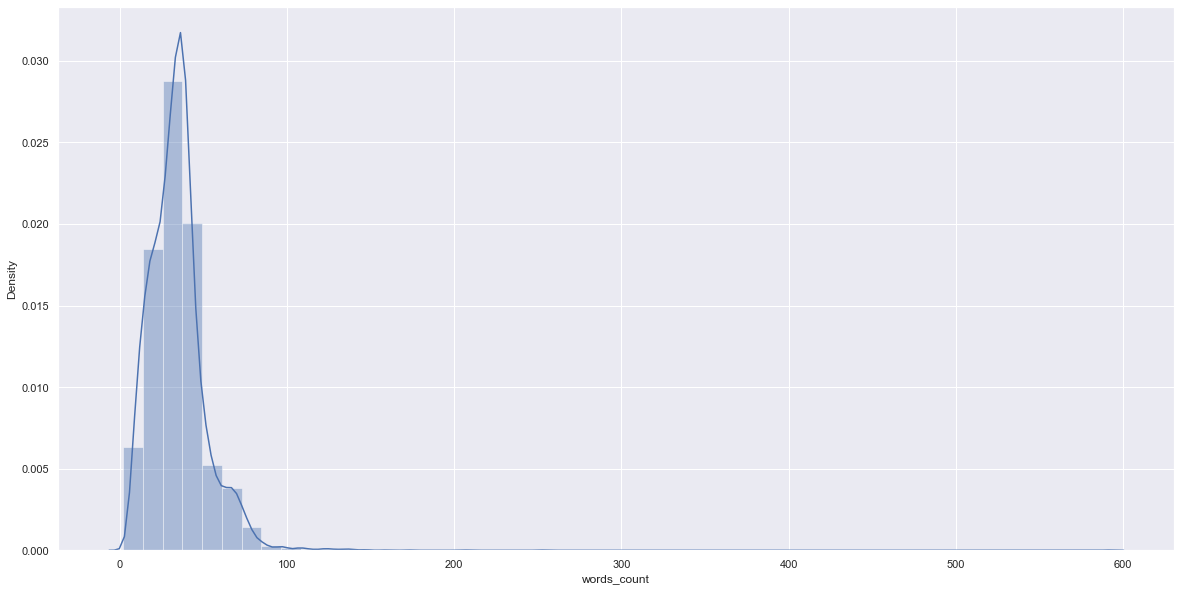

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np

sns.set(rc={"figure.figsize": (20, 10)})
ax = sns.distplot(df["words_count"])
plt.show()


In [9]:
print(f"df size before remove 100+ words: {df.shape}")
df = df[(df["words_count"] < 100) & (df["words_count"] > 5)]
print(f"df size after remove 100+ words: {df.shape}")


df size before remove 100+ words: (9068, 3)
df size after remove 100+ words: (9021, 3)


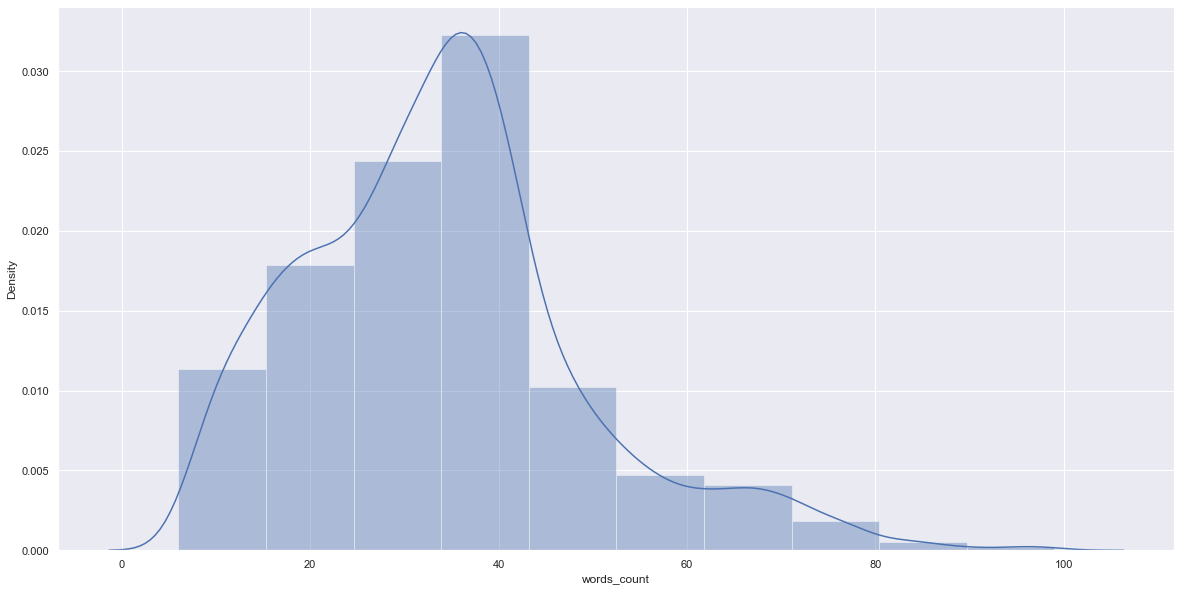

In [10]:
sns.set(rc={"figure.figsize": (20, 10)})
ax = sns.distplot(df["words_count"], bins=10)
plt.show()

In [11]:
df["words_count"].skew()

0.7568931836383078

In [12]:
# Remove words_counts for ml part
df.drop(columns="words_count", axis=1, inplace=True)

In [13]:
df.to_csv('ml_csv.csv')